In [44]:
import pandas as pd
import numpy as np
import plotly.express as px

Lecture 14 Example 1 : Using the simplified countries DataFrame, cs_df, add a column called Population Level that is “Low”, “Medium” or “High” by applying a function called get_pop_level that returns “Low” for Population < 1,000,000, “Medium” for Population > 1,000,000 and < 99,000,000, and “High” for Population > 99,000,000

In [22]:
c_df = pd.read_csv("countries.csv",index_col = 0)
cs_df = c_df.dropna(axis=1)
cs_df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio)
Country,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04"
American Samoa,OCEANIA,57794,199,"290,4","58,29"
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00"
...,...,...,...,...,...
Wallis And Futuna,OCEANIA,16025,274,"58,5","47,08"
Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42"
Yemen,NEAR EAST,21456188,527970,"40,6","0,36"


In [26]:
def get_pop_level(pop):
    if pop < 1000000:
        return "Low"
    elif pop > 1000000 and pop < 99000000:
        return "Medium"
    else:
        "High"

In [42]:
cs_df.loc[:,"Population Level"] = cs_df.apply(lambda x: get_pop_level(x["Population"]),axis = 1)
# or cs_df["Population Level"] = cs_df.apply(lambda x: get_pop_level(x["Population"]),axis = 1)
cs_df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Population Level
Country,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0","0,00",Medium
Albania,EASTERN EUROPE,3581655.0,28748.0,"124,6","1,26",Medium
Algeria,NORTHERN AFRICA,32930091.0,2381740.0,"13,8","0,04",Medium
American Samoa,OCEANIA,57794.0,199.0,"290,4","58,29",Low
Andorra,WESTERN EUROPE,71201.0,468.0,"152,1","0,00",Low
...,...,...,...,...,...,...
Western Sahara,NORTHERN AFRICA,273008.0,266000.0,"1,0","0,42",Low
Yemen,NEAR EAST,21456188.0,527970.0,"40,6","0,36",Medium
Zambia,SUB-SAHARAN AFRICA,11502010.0,752614.0,"15,3","0,00",Medium


Lecture 14 Example 2 : Create a pandas dataframe from the file airplanes.csv using the ICAO Code as the index column. 

Create a scatter plot that shows the correlation between MTOW and MALW including an Ordinary Least Squares regression trendline.

Create a histogram showing the count of how many there are of each range of possible Engine sizes.

Create a pie chart showing market shares of some of the largest airplane manufacturers.

    

In [51]:
airplanes_df = pd.read_csv("airplanes.csv",index_col = 0)
airplanes_df

,Manufacturer,Model,Engine Class,Number of Engines,Min Approach Speed,MTOW,MALW,Weight Class,Parking,Class,Registration Count
ICAO Code,,,,,,,,,,,
A124,ANTONOV,Antonov AN-124 Ruslan,Jet,4,151,892871,727525,Heavy,57915.6,Fixed-wing,55
A19N,AIRBUS,Airbus A319 Neo,Jet,2,130,166449,137789,Medium,14790.0,Fixed-wing,0
A20N,AIRBUS,Airbus A320 Neo,Jet,2,137,174165,148591,Medium,16358.3,Fixed-wing,147
A21N,AIRBUS,Airbus A321 Neo,Jet,2,136,209439,174606,Medium,19253.0,Fixed-wing,106
A306,AIRBUS,Airbus A300 B4-600,Jet,2,137,363760,304230,Heavy,28666.7,Fixed-wing,29
...,...,...,...,...,...,...,...,...,...,...,...
TBM8,SOCATA,Socata TBM-850,Turboprop,1,85,7394,7024,Light,2058.8,Fixed-wing,330
TBM9,SOCATA,Socata TBM-900,Turboprop,1,85,7394,7024,Light,2094.4,Fixed-wing,127
TEX2,RAYTHEON,Raytheon Texan 2,Turboprop,1,103,6500,6900,Light,1657.9,Fixed-wing,446


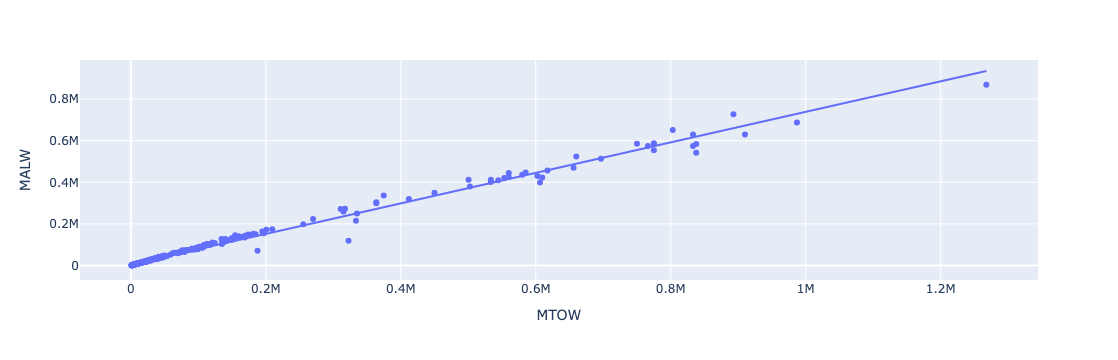

In [55]:
fig1 = px.scatter(airplanes_df,x = "MTOW",y = "MALW",trendline = "ols")
fig1.show()

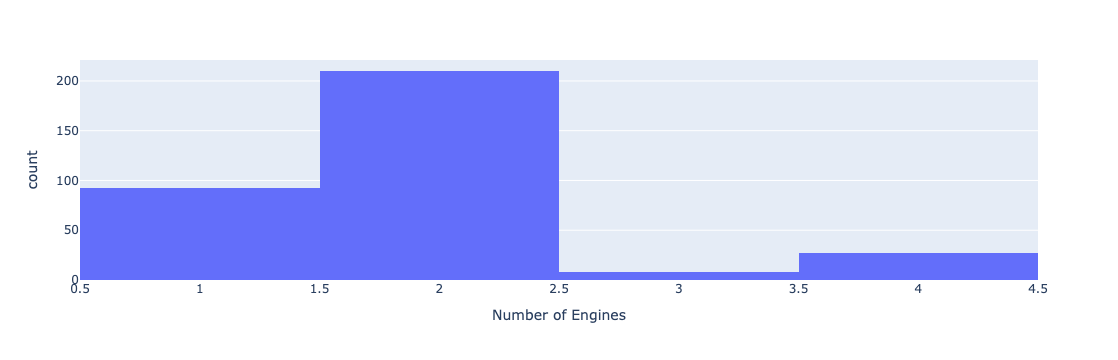

In [57]:
fig2 = px.histogram(airplanes_df, x = "Number of Engines", nbins = 4)
fig2

In [61]:
num_airplanes = airplanes_df.groupby("Manufacturer").sum().reset_index()
num_airplanes

,Manufacturer,Model,Engine Class,Number of Engines,Min Approach Speed,MTOW,MALW,Weight Class,Parking,Class,Registration Count
0,AERO,Aero Commander 500Aero Commander 560Aero Comma...,PistonPistonPistonPiston,8,369,29500,26100,LightLightLightLight,9917.1,Fixed-wingFixed-wingFixed-wingFixed-wing,247
1,AERONCA,Aeronca 7AC,Piston,1,56,1220,1220,Light,1178.9,Fixed-wing,2133
2,AIRBUS,Airbus A319 NeoAirbus A320 NeoAirbus A321 NeoA...,JetJetJetJetJetJetJetJetJetJetJetJetJetJetJetJ...,58,3182,10735443,8032303,MediumMediumMediumHeavyHeavyHeavyMediumMediumM...,799701.9,Fixed-wingFixed-wingFixed-wingFixed-wingFixed-...,2080
3,AIRBUS-BOMBARDIER,Airbus A220-100Airbus A220-300,JetJet,4,265,295407,253090,MediumMedium,31489.8,Fixed-wingFixed-wing,87
4,ANTONOV,Antonov AN-124 RuslanAntonov AN-12Antonov AN-7...,JetTurbopropJet,10,378,1103413,928146,HeavyMediumMedium,84763.4,Fixed-wingFixed-wingFixed-wing,55
...,...,...,...,...,...,...,...,...,...,...,...
71,SUKHOI,SUKHOI Superjet 100-95,Jet,2,140,101148,90390,Medium,10443.8,Fixed-wing,0
72,TAYLORCRAFT,Taylorcraft BC,Piston,1,50,1500,1500,Light,1242.0,Fixed-wing,1358
73,TRANSALL,Transall C-160,Turboprop,2,125,112436,103615,Medium,15718.9,Fixed-wing,0
74,VAN'S,Van's RV-12,Piston,1,53,1320,1320,Light,915.8,Fixed-wing,648


In [67]:
num_airplanes = num_airplanes.loc[(num_airplanes["Manufacturer"] == "AIRBUS") | (num_airplanes["Manufacturer"] == "BOEING")]
num_airplanes

,Manufacturer,Model,Engine Class,Number of Engines,Min Approach Speed,MTOW,MALW,Weight Class,Parking,Class,Registration Count
2,AIRBUS,Airbus A319 NeoAirbus A320 NeoAirbus A321 NeoA...,JetJetJetJetJetJetJetJetJetJetJetJetJetJetJetJ...,58,3182,10735443,8032303,MediumMediumMediumHeavyHeavyHeavyMediumMediumM...,799701.9,Fixed-wingFixed-wingFixed-wingFixed-wingFixed-...,2080
9,BOEING,Boeing 737 MAX 7Boeing 737 MAX 8Boeing 737 MAX...,JetJetJetJetJetJetJetJetJetJetJetJetJetJetJetJ...,98,5488,16672807,12525726,MediumMediumMediumHeavyMediumMediumMediumMediu...,1213032.5,Fixed-wingFixed-wingFixed-wingFixed-wingFixed-...,4378


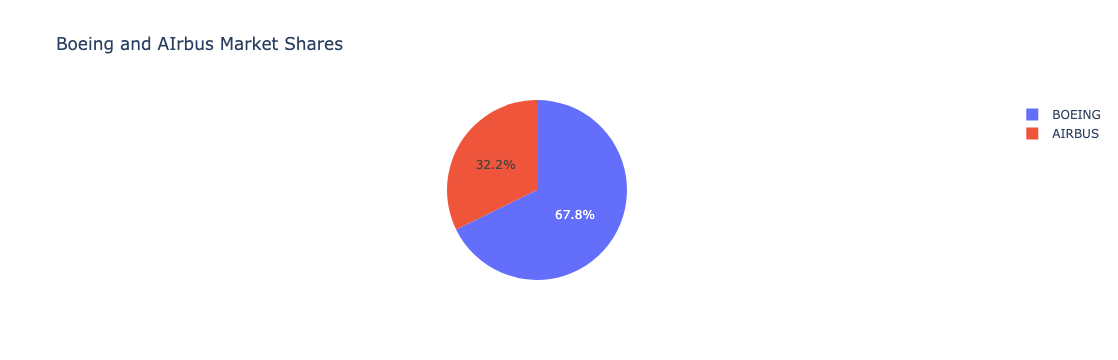

In [71]:
fig3 = px.pie(num_airplanes,values = "Registration Count",names = "Manufacturer",title = "Boeing and AIrbus Market Shares")
fig3

In [79]:
df = pd.DataFrame([["Athena","Test 1", 90.0],["Anna","Test 1", 90.0], ["Athena","Test 2", 98.0]], index = list("abc"), columns=['Name','Test','Grade'])
df

,Name,Test,Grade
a,Athena,Test 1,90.0
b,Anna,Test 1,90.0
c,Athena,Test 2,98.0


TypeError: agg function failed [how->mean,dtype->object]